# CS 109A/AC 209A/STAT 121A Data Science: Data Driven March Madness Milestone #3
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Saturday, November 6th, 2016 at 11:59pm

In [96]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

**Loading in Each Dataframe and Examining the Heads:**

In [97]:
teams_df = pd.read_csv('datasets/Teams.csv', delimiter=',')
teams_df.head()
#teams_df.shape

,Team_Id,Team_Name
0,1101,Abilene Chr
1,1102,Air Force
2,1103,Akron
3,1104,Alabama
4,1105,Alabama A&M


In [98]:
seasons_df = pd.read_csv('datasets/Seasons.csv', delimiter = ',')
seasons_df.head()
#seasons_df.shape

,Season,Dayzero,Regionw,Regionx,Regiony,Regionz
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


In [99]:
seasons_results_detailed_df = pd.read_csv('datasets/RegularSeasonDetailedResults.csv', delimiter = ',')
seasons_results_detailed_df.head()
#seasons_results_detailed_df.shape

#X = seasons_results_detailed_df.as_matrix(columns = ['Wscore'])
#y = seasons_results_detailed_df.as_matrix(columns = ['status'])
#y = np.ravel(y)

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


Year: 2003
Winning team median score: 75.0
Losing team median score: 63.0
Winning team mean score: 75.7950606586
Losing team mean score: 63.756932409


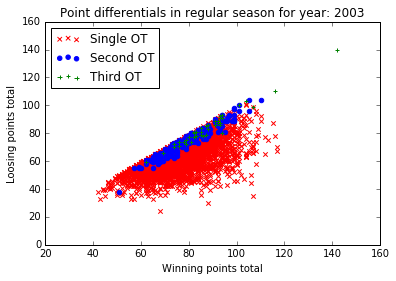

Year: 2004
Winning team median score: 75.0
Losing team median score: 63.0
Winning team mean score: 74.9711222927
Losing team mean score: 62.9901553271


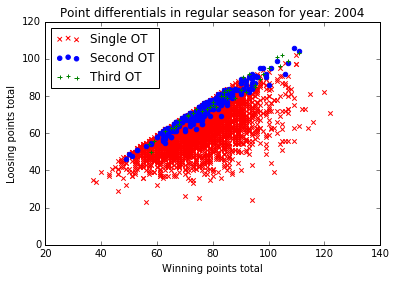

Year: 2005
Winning team median score: 74.0
Losing team median score: 62.0
Winning team mean score: 74.6936898396
Losing team mean score: 62.6352941176


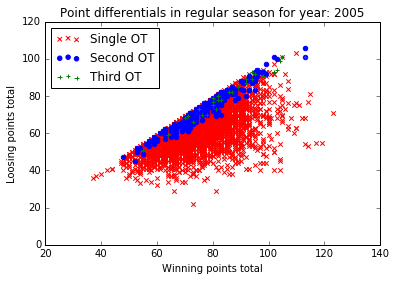

Year: 2006
Winning team median score: 74.0
Losing team median score: 62.0
Winning team mean score: 74.5875551818
Losing team mean score: 62.6665965945


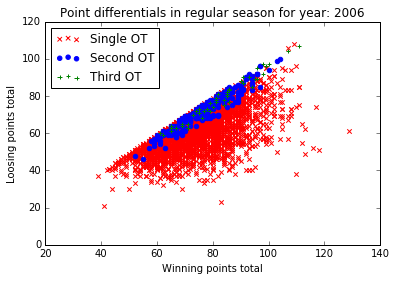

Year: 2007
Winning team median score: 74.0
Losing team median score: 63.0
Winning team mean score: 74.8294665873
Losing team mean score: 62.7616498116


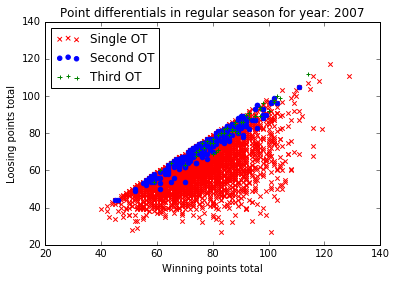

Year: 2008
Winning team median score: 74.0
Losing team median score: 62.0
Winning team mean score: 74.9624249467
Losing team mean score: 62.7553747821


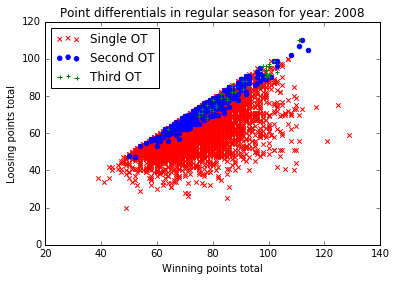

Year: 2009
Winning team median score: 73.0
Losing team median score: 62.0
Winning team mean score: 74.0337207087
Losing team mean score: 61.9803772147


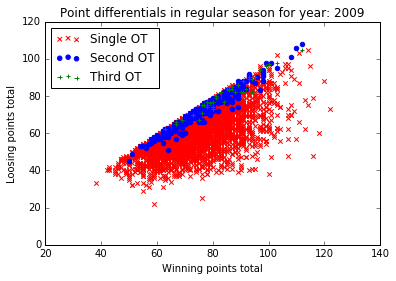

Year: 2010
Winning team median score: 74.0
Losing team median score: 62.0
Winning team mean score: 74.6524795744
Losing team mean score: 62.4843245297


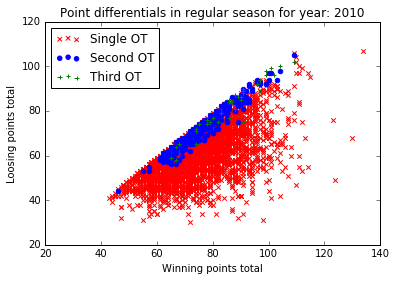

Year: 2011
Winning team median score: 74.0
Losing team median score: 62.0
Winning team mean score: 74.3741898589
Losing team mean score: 62.4706443004


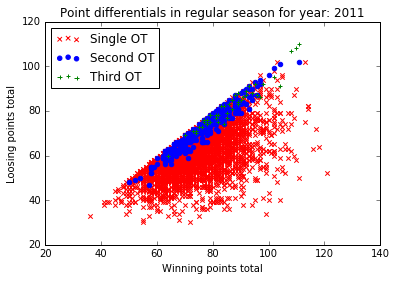

Year: 2012
Winning team median score: 73.0
Losing team median score: 61.0
Winning team mean score: 73.3799733486
Losing team mean score: 61.4159527889


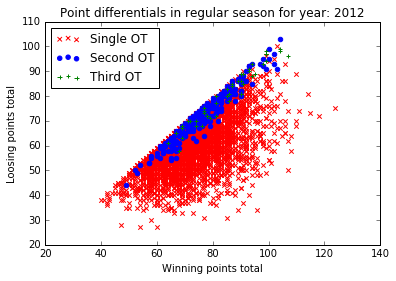

Year: 2013
Winning team median score: 72.0
Losing team median score: 61.0
Winning team mean score: 72.8407894737
Losing team mean score: 60.9080827068


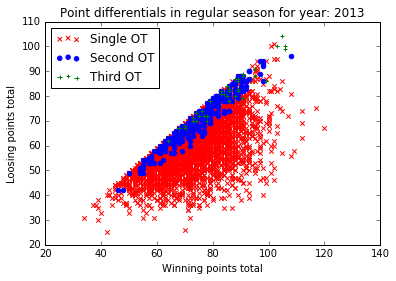

Year: 2014
Winning team median score: 75.0
Losing team median score: 64.0
Winning team mean score: 76.1012681835
Losing team mean score: 64.4520701231


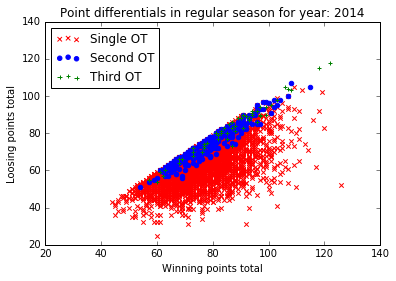

Year: 2015
Winning team median score: 72.0
Losing team median score: 61.0
Winning team mean score: 72.6807994023
Losing team mean score: 61.0078446022


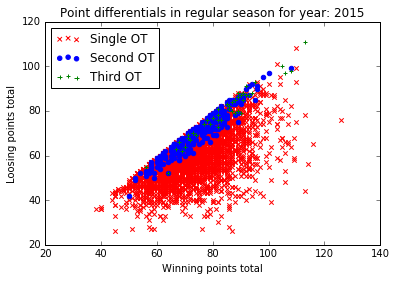

Year: 2016
Winning team median score: 78.0
Losing team median score: 66.0
Winning team mean score: 78.295958279
Losing team mean score: 66.3270627677


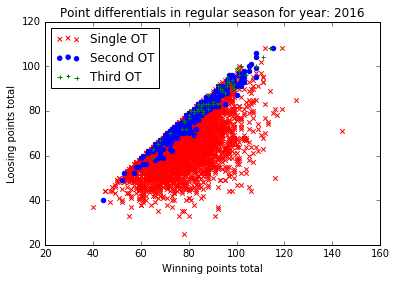

In [210]:
years = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
for year in years:
    
    cut_year = seasons_results_detailed_df.where(seasons_results_detailed_df['Season'] == year)
    print "Year:", year
    print 'Winning team median score:', cut_year['Wscore'].median()
    print 'Losing team median score:', cut_year['Lscore'].median()
    
    print 'Winning team mean score:', cut_year['Wscore'].mean()
    print 'Losing team mean score:', cut_year['Lscore'].mean()
    
    reg_seas_X = cut_year['Wscore'].where(seasons_results_detailed_df['Numot'] == 0)
    reg_seas_y = cut_year['Lscore'].where(seasons_results_detailed_df['Numot'] == 0)

    oot_seas_X = cut_year['Wscore'].where(seasons_results_detailed_df['Numot'] == 1)
    oot_seas_y = cut_year['Lscore'].where(seasons_results_detailed_df['Numot'] == 1)

    tot_seas_X = cut_year['Wscore'].where(seasons_results_detailed_df['Numot'] == 2)
    tot_seas_y = cut_year['Lscore'].where(seasons_results_detailed_df['Numot'] == 2)

    
    one_ot = plt.scatter(reg_seas_X,reg_seas_y, color = 'red', marker='x')
    two_ot = plt.scatter(oot_seas_X,oot_seas_y, color = 'blue', marker='o')
    three_ot = plt.scatter(tot_seas_X,tot_seas_y, color = 'green', marker='+')
    plt.ylabel('Loosing points total')
    plt.xlabel('Winning points total')
    plt.legend([one_ot, two_ot, three_ot], ['Single OT', 'Second OT', 'Third OT'], loc = 'upper left')
    plt.title('Point differentials in regular season for year: %s' %year)
    plt.show()

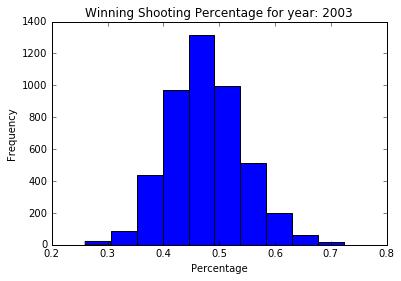

Winning team median Shooting Percentage: 0.474788135593
Winning team mean Shooting Percentage: 0.476635158763


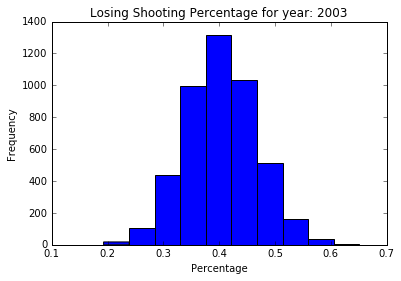

Losing team median Shooting Percentage: 0.402985074627
Losing team mean Shooting Percentage: 0.403678048391


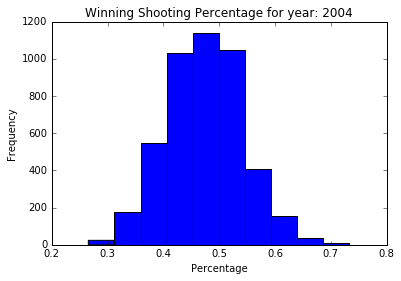

Winning team median Shooting Percentage: 0.471698113208
Winning team mean Shooting Percentage: 0.472597382748


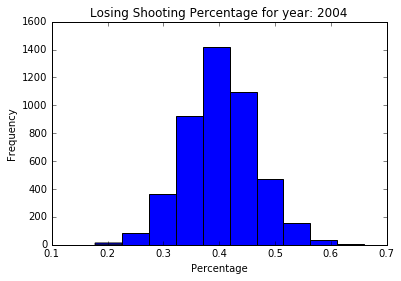

Losing team median Shooting Percentage: 0.402985074627
Losing team mean Shooting Percentage: 0.402428182186


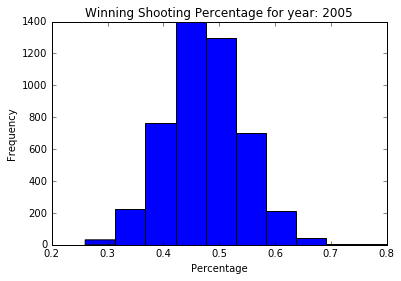

Winning team median Shooting Percentage: 0.472727272727
Winning team mean Shooting Percentage: 0.474548421291


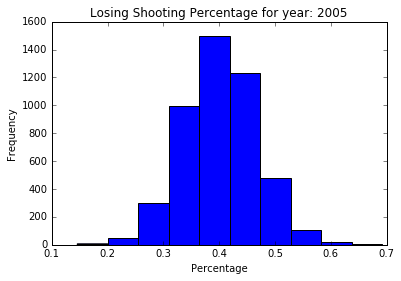

Losing team median Shooting Percentage: 0.4
Losing team mean Shooting Percentage: 0.40184265054


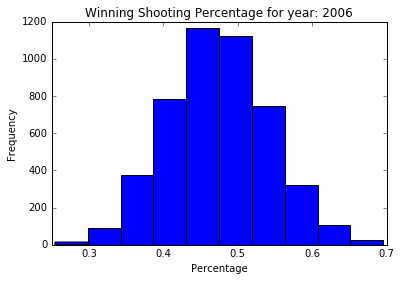

Winning team median Shooting Percentage: 0.472727272727
Winning team mean Shooting Percentage: 0.473968899448


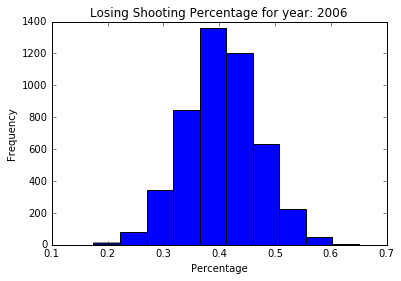

Losing team median Shooting Percentage: 0.403225806452
Losing team mean Shooting Percentage: 0.403535473411


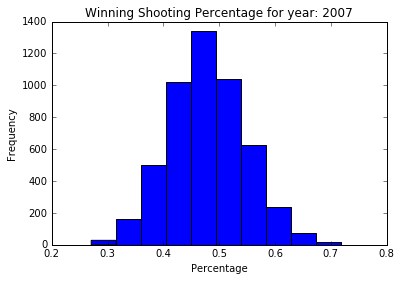

Winning team median Shooting Percentage: 0.478260869565
Winning team mean Shooting Percentage: 0.479335654614


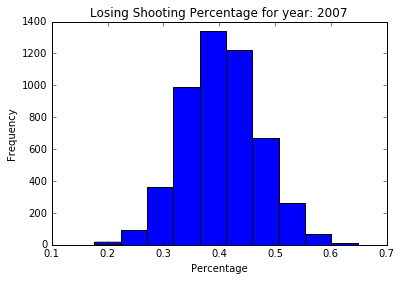

Losing team median Shooting Percentage: 0.403225806452
Losing team mean Shooting Percentage: 0.403820781556


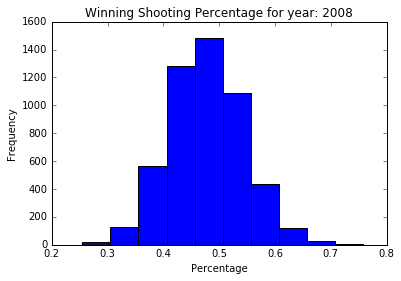

Winning team median Shooting Percentage: 0.475
Winning team mean Shooting Percentage: 0.477028336818


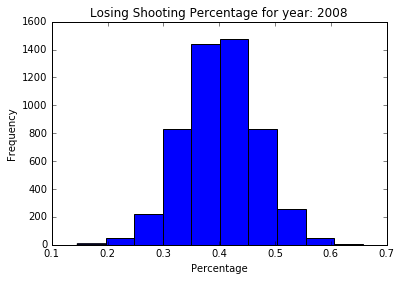

Losing team median Shooting Percentage: 0.40350877193
Losing team mean Shooting Percentage: 0.40244453206


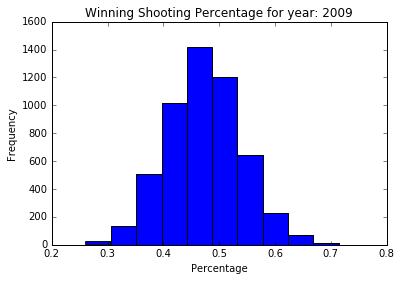

Winning team median Shooting Percentage: 0.471698113208
Winning team mean Shooting Percentage: 0.473112148059


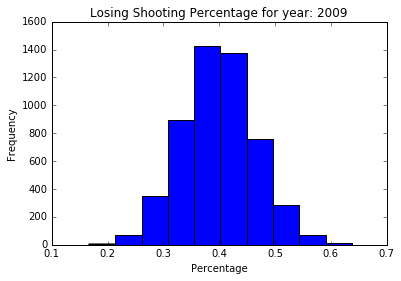

Losing team median Shooting Percentage: 0.396825396825
Losing team mean Shooting Percentage: 0.39875469499


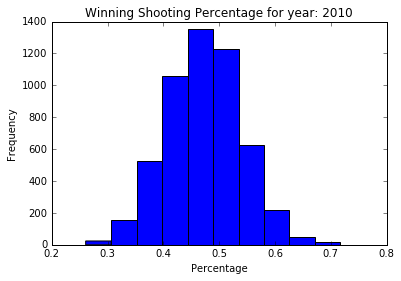

Winning team median Shooting Percentage: 0.471698113208
Winning team mean Shooting Percentage: 0.472647328118


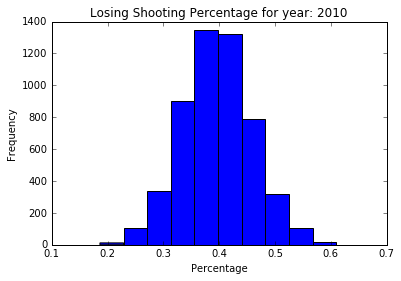

Losing team median Shooting Percentage: 0.395833333333
Losing team mean Shooting Percentage: 0.39644695663


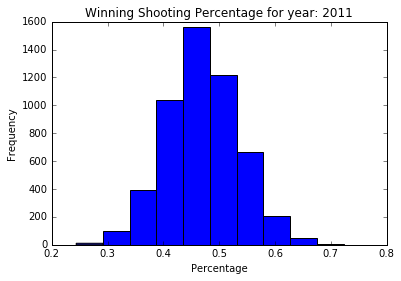

Winning team median Shooting Percentage: 0.469696969697
Winning team mean Shooting Percentage: 0.471346877599


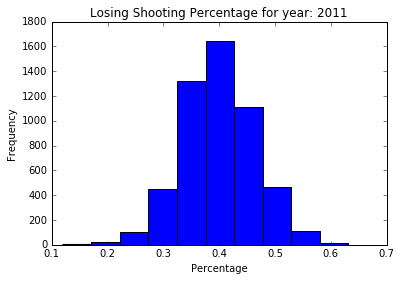

Losing team median Shooting Percentage: 0.397425317709
Losing team mean Shooting Percentage: 0.399565467449


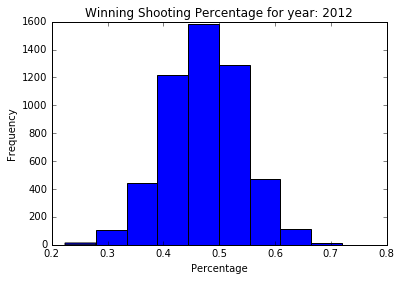

Winning team median Shooting Percentage: 0.470588235294
Winning team mean Shooting Percentage: 0.472501238223


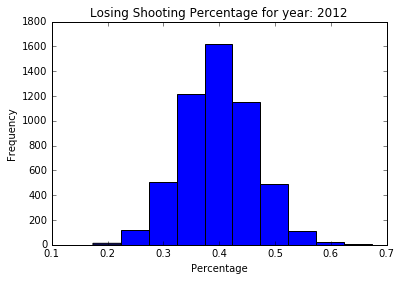

Losing team median Shooting Percentage: 0.397058823529
Losing team mean Shooting Percentage: 0.398608337824


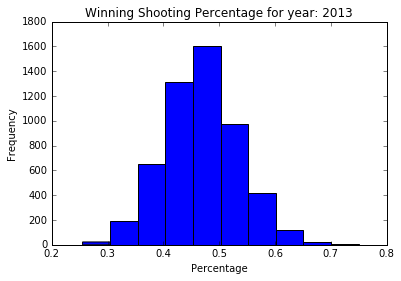

Winning team median Shooting Percentage: 0.469387755102
Winning team mean Shooting Percentage: 0.46941729131


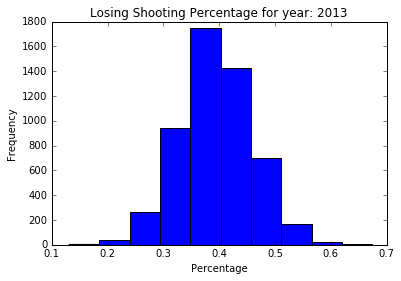

Losing team median Shooting Percentage: 0.392156862745
Losing team mean Shooting Percentage: 0.394651099504


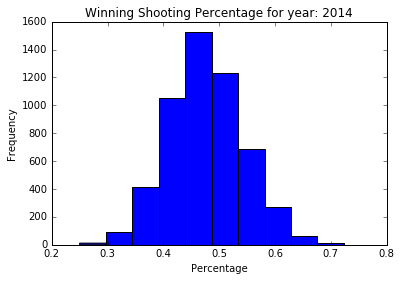

Winning team median Shooting Percentage: 0.47285012285
Winning team mean Shooting Percentage: 0.476172819641


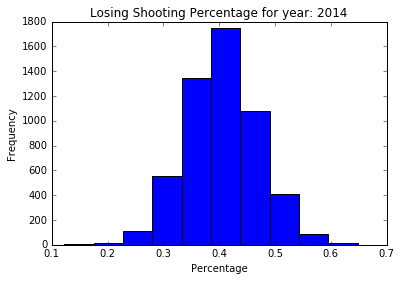

Losing team median Shooting Percentage: 0.403846153846
Losing team mean Shooting Percentage: 0.405092973441


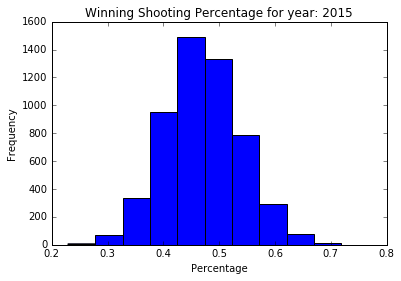

Winning team median Shooting Percentage: 0.469387755102
Winning team mean Shooting Percentage: 0.470881934615


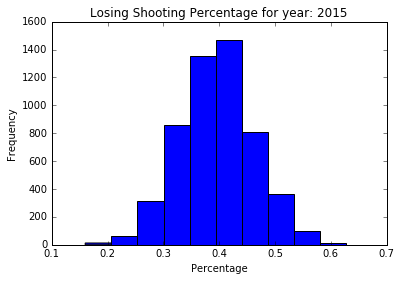

Losing team median Shooting Percentage: 0.396226415094
Losing team mean Shooting Percentage: 0.396294027665


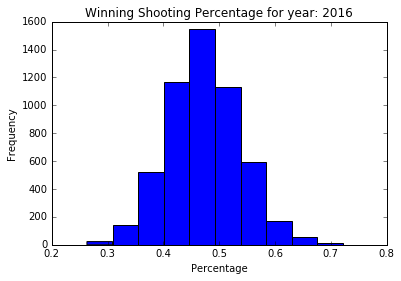

Winning team median Shooting Percentage: 0.472222222222
Winning team mean Shooting Percentage: 0.473525966288


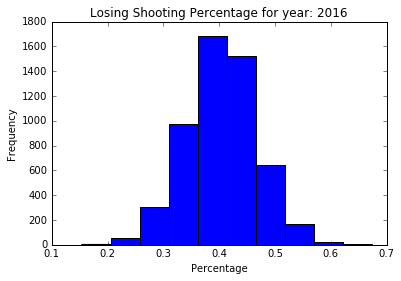

Losing team median Shooting Percentage: 0.403846153846
Losing team mean Shooting Percentage: 0.403877580672


In [214]:
#print seasons_results_detailed_df
for year in years:

    cut_year = seasons_results_detailed_df[seasons_results_detailed_df['Season'] == year]

    win_fg = cut_year['Wfgm']
    win_figa = cut_year['Wfga']

    los_fg = cut_year['Lfgm']
    los_figa = cut_year['Lfga']
    
    X_win = win_fg.div(win_figa)
    X_loss = los_fg.div(los_figa)
    
    plt.hist(X_win)
    plt.title("Winning Shooting Percentage for year: %s" %year)
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    print 'Winning team median Shooting Percentage:', X_win.median()
    print 'Winning team mean Shooting Percentage:', X_win.mean()

    plt.hist(X_loss)
    plt.title("Losing Shooting Percentage for year: %s" %year)
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    
    print 'Losing team median Shooting Percentage:', X_loss.median()
    print 'Losing team mean Shooting Percentage:', X_loss.mean()

In [102]:
seasons_results_compact_df = pd.read_csv('datasets/RegularSeasonCompactResults.csv', delimiter = ',')
seasons_results_compact_df.head()
#seasons_results_compact_df.shape

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [103]:
tourney_results_detailed_df = pd.read_csv('datasets/TourneyDetailedResults.csv', delimiter = ',')
tourney_results_detailed_df.head()
#tourney_results_detailed_df.shape

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [104]:
tourney_results_compact_df = pd.read_csv('datasets/TourneyCompactResults.csv', delimiter = ',')
tourney_results_compact_df.head()
#tourney_results_compact_df.shape

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [110]:
tourney_seeds_df = pd.read_csv('datasets/TourneySeeds.csv', delimiter = ',')
tourney_seeds_df.head()
#tourney_seeds_df.shape


,Season,Seed,Team
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [215]:
winner = tourney_results_compact_df[['Season', 'Wteam']]
list_win = []
list_reg = []
wins = []
for index, row in winner.iterrows():
    cur_year = tourney_seeds_df.loc[tourney_seeds_df['Season'] == row['Season']]
    win_seed = cur_year.loc[cur_year['Team'] == row['Wteam']]
    list_win.append(int((win_seed['Seed'].values)[0][1:3]))
    list_reg.append((win_seed['Seed'].values)[0][0])
    #wins.append()
winner['Wseed'] = list_win
winner['Wseedreg'] = list_reg

C:\Users\Keenan\Anaconda3\envs\python2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Keenan\Anaconda3\envs\python2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


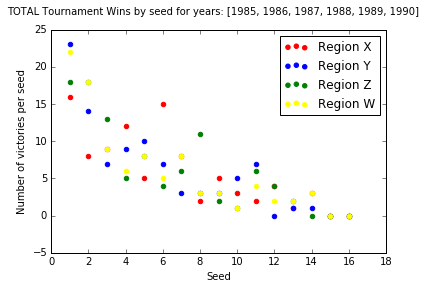

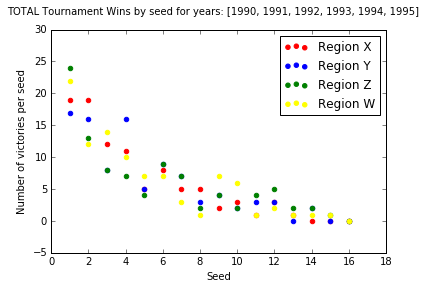

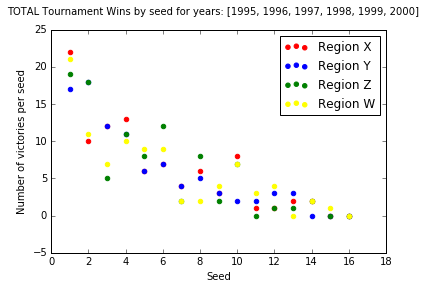

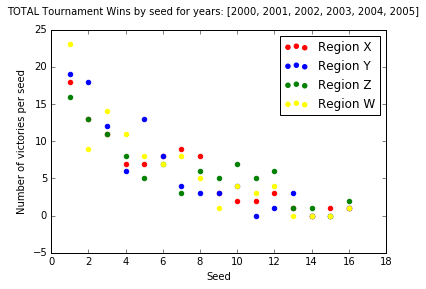

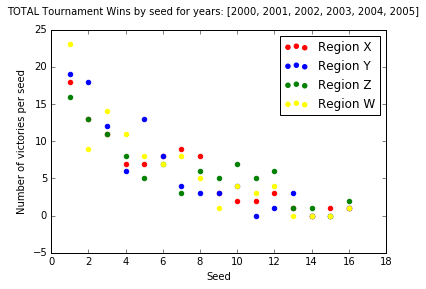

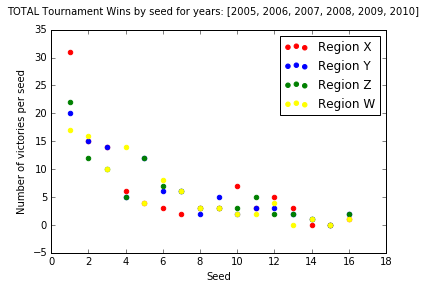

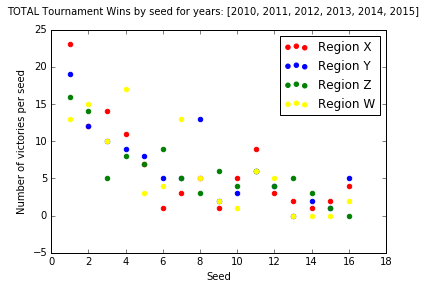

In [216]:
five_year_range = [range(1985, 1991), range(1990, 1996), range(1995, 2001), range(2000, 2006), range(2000, 2006), range(2005, 2011),range(2010, 2016)]
for year_set in five_year_range:
    #this is perfect
    cur_year_df = winner.loc[winner['Season'].isin(year_set)]
    seed_win_countX = dict.fromkeys(range(1,17), 0)
    seed_win_countY = dict.fromkeys(range(1,17), 0)
    seed_win_countZ = dict.fromkeys(range(1,17), 0)
    seed_win_countW = dict.fromkeys(range(1,17), 0)
    
    d = {'X':seed_win_countX, 'Y':seed_win_countY, 'Z':seed_win_countZ, 'W':seed_win_countW}
    #this part works now! creates dictionary of how many times teams within each region won by seed
    for key, value in d.iteritems():
        cur_reg = cur_year_df.loc[cur_year_df['Wseedreg']==key]
        for val_key, val_val in value.iteritems():
            value[val_key] = (cur_reg['Wseed'] == val_key).sum()
    
    reg_X = plt.scatter(seed_win_countX.keys(),seed_win_countX.values(), color = 'red')
    reg_Y = plt.scatter(seed_win_countY.keys(),seed_win_countY.values(), color = 'blue')
    reg_Z = plt.scatter(seed_win_countZ.keys(),seed_win_countZ.values(), color = 'green')
    reg_W = plt.scatter(seed_win_countW.keys(),seed_win_countW.values(), color = 'yellow')
    plt.ylabel('Number of victories per seed')
    plt.xlabel('Seed')
    plt.suptitle('TOTAL Tournament Wins by seed for years: %s' %year_set)
    plt.legend([reg_X, reg_Y, reg_Z, reg_W], ['Region X', 'Region Y', 'Region Z', 'Region W', ], loc = 'upper right')
    plt.show()

In [106]:
tourney_slots_df = pd.read_csv('datasets/TourneySlots.csv', delimiter = ',')
tourney_slots_df.head()
#tourney_slots_df.shape

,Season,Slot,Strongseed,Weakseed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14
3,1985,R1W4,W04,W13
4,1985,R1W5,W05,W12


Below is a sample output table. Encoded in the 'Id' field is the following information: predictionYear_team1ID_team2ID. The 'Pred' column is fixed at 0.5 for sample purposes:

In [107]:
sample_df = pd.read_csv('datasets/SampleSubmission.csv', delimiter = ',')
sample_df.head()
#sample_df.shape

,Id,Pred
0,2016_1112_1114,0.5
1,2016_1112_1122,0.5
2,2016_1112_1124,0.5
3,2016_1112_1138,0.5
4,2016_1112_1139,0.5
